In [100]:
import numpy as np
import pandas as pd

In [101]:
# colab
# file_path = '/content/drive/MyDrive/kaggle-study/3/Auction_master_kr/'

# jupyter
file_path = './Auction_master_kr/'

train = pd.read_csv(file_path + 'Auction_master_train.csv')
test = pd.read_csv(file_path + 'Auction_master_test.csv')
submission = pd.read_csv(file_path + 'Auction_submission.csv')
rent = pd.read_csv(file_path + 'Auction_rent.csv')
regist = pd.read_csv(file_path + 'Auction_regist.csv')
result = pd.read_csv(file_path + 'Auction_result.csv')

In [102]:
# 칼럼이 많으면 중간에 생략된다 -> 모든 칼럼을 보기위한 옵션 설정
pd.set_option('display.max_columns', 41)

In [103]:
train.shape

(1933, 41)

In [104]:
test.shape

(829, 41)

In [105]:
submission.shape

(829, 2)

In [106]:
result.shape

(8528, 6)

In [107]:
regist.shape

(20702, 7)

In [108]:
train.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,NaN,N,1398.0,NaN,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,NaN,N,1407.0,NaN,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,NaN,N,552.0,NaN,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,남구,대연동,NaN,N,243.0,23.0,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,사하구,괴정동,NaN,N,399.0,2.0,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [109]:
result.head()

,Auction_key,Auction_seq,Auction_date,Appraisal_price,Minimum_sales_price,Auction_results
0,1,1,2011-06-21 00:00:00,313000000,313000000,변경
1,1,2,2011-12-13 00:00:00,313000000,313000000,변경
2,1,3,2016-05-17 00:00:00,298000000,298000000,유찰
3,1,4,2016-06-21 00:00:00,298000000,238400000,유찰
4,1,5,2016-07-26 00:00:00,298000000,190720000,유찰


In [110]:
regist.head()

,Auction_key,Auction_seq,Regist_type,Regist_class,Regist_date,Creditor,Regist_price
0,1,10001,집합건물등기,소유이전,20050715,Private,0
1,1,10002,집합건물등기,가압,20050914,푸른이상호저축은행,860547945
2,1,10003,집합건물등기,가압,20051229,Private,189800000
3,1,10004,집합건물등기,가압,20060428,Private,1346000000
4,1,10005,집합건물등기,가처분,20070410,Private,0


## train 데이터 확인


**회귀 -> 타겟값 정규분포로 하는 것 생각!**


In [111]:
train['Auction_class'].value_counts()

임의    1439
강제     494
Name: Auction_class, dtype: int64

In [112]:
train['Appraisal_company'].value_counts()

부경감정        33
자연감정        33
서초감정        31
한마음감정       30
대일감정        30
            ..
(주)티앤비감정     1
신화감정         1
TNB감정        1
녹원감정         1
서울감정         1
Name: Appraisal_company, Length: 238, dtype: int64

In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Auction_key                  1933 non-null   int64  
 1   Auction_class                1933 non-null   object 
 2   Bid_class                    1933 non-null   object 
 3   Claim_price                  1933 non-null   int64  
 4   Appraisal_company            1933 non-null   object 
 5   Appraisal_date               1933 non-null   object 
 6   Auction_count                1933 non-null   int64  
 7   Auction_miscarriage_count    1933 non-null   int64  
 8   Total_land_gross_area        1933 non-null   float64
 9   Total_land_real_area         1933 non-null   float64
 10  Total_land_auction_area      1933 non-null   float64
 11  Total_building_area          1933 non-null   float64
 12  Total_building_auction_area  1933 non-null   float64
 13  Total_appraisal_pr

###

In [114]:
train['Hammer_price']

0        760000000
1        971889999
2         93399999
3        256899000
4        158660000
           ...    
1928     402500000
1929     430234600
1930    1118999990
1931     403000000
1932     686010000
Name: Hammer_price, Length: 1933, dtype: int64

In [115]:
train_processed = train.copy()

In [116]:
train_processed['Hammer_price'] = np.log1p(train['Hammer_price'])

In [117]:
train_processed['Hammer_price']

0       20.448829
1       20.694753
2       18.352402
3       19.364194
4       18.882274
          ...    
1928    19.813206
1929    19.879841
1930    20.835701
1931    19.814447
1932    20.346403
Name: Hammer_price, Length: 1933, dtype: float64

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\yrc92\.conda\envs\ai_study_py37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hammer_price', ylabel='Density'>

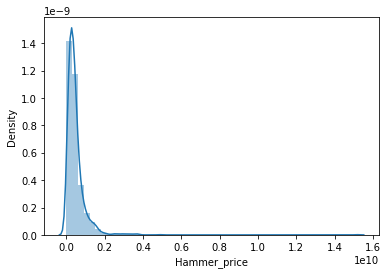

In [119]:
sns.distplot(train['Hammer_price'])

C:\Users\yrc92\.conda\envs\ai_study_py37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hammer_price', ylabel='Density'>

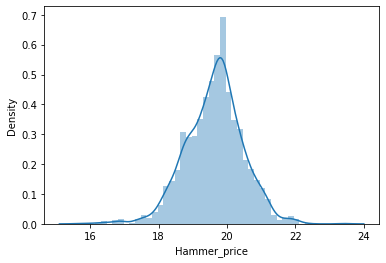

In [120]:
sns.distplot(train_processed['Hammer_price'])

### try 1

일단 따로 생각해야될 것 같은 피처의 데이터들은 drop하고 나머지 데이터 전처리 후 결과보자.

#### feature engineering 가능해보이는 피처
- `Total_floor`-`Current_floor` : 나누기를 통해? -> 보통 윗 층이 더 비싸지 않나? 그렇다고 이 피처들 지워도되려나
- `First_auction_date`-`Final_auction_date` : 두 날짜 사이를 빼보기?

In [121]:
train['Apartment_usage'].value_counts()

아파트     1656
주상복합     277
Name: Apartment_usage, dtype: int64

In [122]:
train['Preserve_regist_date'].value_counts()

1111-11-11 00:00:00    43
1971-03-31 00:00:00    27
2012-02-10 00:00:00    12
2011-08-05 00:00:00     9
2008-12-02 00:00:00     7
                       ..
2007-03-02 00:00:00     1
1999-01-18 00:00:00     1
2008-05-02 00:00:00     1
1999-02-09 00:00:00     1
1993-05-04 00:00:00     1
Name: Preserve_regist_date, Length: 1256, dtype: int64

In [123]:
train['Close_date'].value_counts()

2016-09-08 00:00:00    37
2017-03-29 00:00:00    20
2017-06-29 00:00:00    19
2018-02-28 00:00:00    19
2017-12-28 00:00:00    17
                       ..
2017-08-29 00:00:00     1
2017-11-28 00:00:00     1
2017-08-03 00:00:00     1
2018-03-12 00:00:00     1
2018-07-17 00:00:00     1
Name: Close_date, Length: 389, dtype: int64

In [124]:
train['Close_result'].value_counts()

배당      1921
          12
Name: Close_result, dtype: int64

In [125]:
# 주소에 대한 데이터 다 지웠다 -> 좌표 값으로 다 해결될 것이라 생각
drop_cols = [
    'Auction_key', 'Auction_class', 'Bid_class', 'Appraisal_company', 'Appraisal_date', 
    'Final_result', 'Creditor', 'addr_do', 'addr_si', 'addr_dong', 'addr_li', 'addr_san', 
    'addr_bunji1', 'addr_bunji2', 'addr_etc', 'Specific', 'road_name', 'road_bunji1', 
    'road_bunji2', 'Close_date', 'Close_result']
ordinal_cols = ['Auction_class', 'Apartment_usage', 'Share_auction_YorN']
onehot_cols = ['Bid_class']
datetime_cols = ['First_auction_date', 'Final_auction_date', 'Preserve_regist_date']

In [126]:
train_processed.drop(drop_cols, inplace=True, axis=1)

In [127]:
train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Claim_price                  1933 non-null   int64  
 1   Auction_count                1933 non-null   int64  
 2   Auction_miscarriage_count    1933 non-null   int64  
 3   Total_land_gross_area        1933 non-null   float64
 4   Total_land_real_area         1933 non-null   float64
 5   Total_land_auction_area      1933 non-null   float64
 6   Total_building_area          1933 non-null   float64
 7   Total_building_auction_area  1933 non-null   float64
 8   Total_appraisal_price        1933 non-null   int64  
 9   Minimum_sales_price          1933 non-null   int64  
 10  First_auction_date           1933 non-null   object 
 11  Final_auction_date           1933 non-null   object 
 12  Apartment_usage              1933 non-null   object 
 13  Preserve_regist_da

#### Preserve_regist_date

`1111-11-11 00:00:00`인 값이 있다. 값을 처리할 수 없는 것에 이렇게 되어있는 듯? -> 아직 한번도 등기된 적 없는 집?


위와 같이 생각한 이유는 `Close_result`가 배당이 아닌 데이터의 `Close_date` 가 `1111-11-11 00:00:00` 인 것을 확인했고 그렇다면 date가 없는 값이 이렇게 최리 되는것이 아닌가... 라고 생각

In [128]:
# Preserve_regist_date 에 이상한 date 값 있는 것 확인
train['Preserve_regist_date'].sort_values()

491     1111-11-11 00:00:00
626     1111-11-11 00:00:00
1266    1111-11-11 00:00:00
637     1111-11-11 00:00:00
1747    1111-11-11 00:00:00
               ...         
1863    2016-05-20 00:00:00
240     2016-08-24 00:00:00
1281    2017-03-06 00:00:00
1096    2017-03-10 00:00:00
1864    2017-06-12 00:00:00
Name: Preserve_regist_date, Length: 1933, dtype: object

In [129]:
# Close_result 값이 '배당'이 아닌 것의 date가 1111-11-11 00:00:00 임을 확인
train[train['Close_result'] != '배당']['Close_date']

962     1111-11-11 00:00:00
1016    1111-11-11 00:00:00
1026    1111-11-11 00:00:00
1040    1111-11-11 00:00:00
1146    1111-11-11 00:00:00
1407    1111-11-11 00:00:00
1438    1111-11-11 00:00:00
1627    1111-11-11 00:00:00
1640    1111-11-11 00:00:00
1665    1111-11-11 00:00:00
1867    1111-11-11 00:00:00
1924    1111-11-11 00:00:00
Name: Close_date, dtype: object

In [130]:
# 위의 값이 전부 다 나온것임을 확인
# 배당이 안 되었으므로 Close_date 가 없는 것
train[train['Close_date'] == '1111-11-11 00:00:00'].index

Int64Index([962, 1016, 1026, 1040, 1146, 1407, 1438, 1627, 1640, 1665, 1867,
            1924],
           dtype='int64')

In [131]:
# Preserve_regist_date 가 1111-11-11 00:00:00 인 것의 Close_result 확인 -> 관련이 있나? -> 없는 듯
train[train['Preserve_regist_date'] == '1111-11-11 00:00:00'][['Close_result', 'Preserve_regist_date']]

,Close_result,Preserve_regist_date
29,배당,1111-11-11 00:00:00
32,배당,1111-11-11 00:00:00
81,배당,1111-11-11 00:00:00
84,배당,1111-11-11 00:00:00
118,배당,1111-11-11 00:00:00
122,배당,1111-11-11 00:00:00
224,배당,1111-11-11 00:00:00
227,배당,1111-11-11 00:00:00
239,배당,1111-11-11 00:00:00
294,배당,1111-11-11 00:00:00


In [132]:
train[train['Preserve_regist_date'] == '1111-11-11 00:00:00'].head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
29,1783,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,6,5,532.0,16.65,16.65,98.08,98.08,228745632,117118000,2013-07-04 00:00:00,2016-04-29 00:00:00,낙찰,Private,부산,동래구,낙민동,NaN,N,236.0,NaN,",237-2 삼주 8층 801호",주상복합,1111-11-11 00:00:00,15,8,"**1차감정:220,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,126630000
32,1826,임의,일반,45000000,태화감정,2015-09-21 00:00:00,3,1,0.0,0.00,0.00,68.20,68.20,67000000,53600000,2016-09-30 00:00:00,2016-12-29 00:00:00,낙찰,Private,부산,연제구,연산동,NaN,Y,20.0,55.0,국토 4층 402호,아파트,1111-11-11 00:00:00,8,4,NaN,N,망미번영로,103.0,NaN,2017-03-08 00:00:00,배당,35.176351,129.111235,55203000
81,1914,강제,일반,180000000,태평양감정,2015-12-29 00:00:00,2,1,4010.0,21.10,21.10,84.99,84.99,288000000,230400000,2016-05-04 00:00:00,2016-06-01 00:00:00,낙찰,Private,부산,연제구,연산동,NaN,N,406.0,10.0,연산동한솔솔파크 101동 11층 1102호,아파트,1111-11-11 00:00:00,21,11,NaN,N,과정로,211.0,NaN,2016-08-03 00:00:00,배당,35.187269,129.103845,277111500
84,1781,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,6,5,532.0,16.65,16.65,98.08,98.08,228745632,117118000,2013-07-04 00:00:00,2016-04-29 00:00:00,낙찰,Private,부산,동래구,낙민동,NaN,N,236.0,NaN,",237-2 삼주 7층 701호",주상복합,1111-11-11 00:00:00,15,7,"**1차감정:220,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,135330000
118,1986,임의,일반,70000000,알비감정,2016-04-20 00:00:00,1,0,0.0,0.00,0.00,83.33,83.33,54700000,54700000,2016-07-20 00:00:00,2016-07-20 00:00:00,낙찰,Private,부산,연제구,연산동,NaN,Y,20.0,55.0,국토 1층 108호,아파트,1111-11-11 00:00:00,8,1,NaN,N,망미번영로,103.0,NaN,2016-10-19 00:00:00,배당,35.176351,129.111235,60000000


In [133]:
train_processed[train['Preserve_regist_date'] == '1111-11-11 00:00:00'].head()

,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,point.y,point.x,Hammer_price
29,1087000000,6,5,532.0,16.65,16.65,98.08,98.08,228745632,117118000,2013-07-04 00:00:00,2016-04-29 00:00:00,주상복합,1111-11-11 00:00:00,15,8,N,35.201112,129.088687,18.656780
32,45000000,3,1,0.0,0.00,0.00,68.20,68.20,67000000,53600000,2016-09-30 00:00:00,2016-12-29 00:00:00,아파트,1111-11-11 00:00:00,8,4,N,35.176351,129.111235,17.826528
81,180000000,2,1,4010.0,21.10,21.10,84.99,84.99,288000000,230400000,2016-05-04 00:00:00,2016-06-01 00:00:00,아파트,1111-11-11 00:00:00,21,11,N,35.187269,129.103845,19.439931
84,1087000000,6,5,532.0,16.65,16.65,98.08,98.08,228745632,117118000,2013-07-04 00:00:00,2016-04-29 00:00:00,주상복합,1111-11-11 00:00:00,15,7,N,35.201112,129.088687,18.723227
118,70000000,1,0,0.0,0.00,0.00,83.33,83.33,54700000,54700000,2016-07-20 00:00:00,2016-07-20 00:00:00,아파트,1111-11-11 00:00:00,8,1,N,35.176351,129.111235,17.909855


In [134]:
train_processed[train['Preserve_regist_date'] == '1111-11-11 00:00:00']['Final_auction_date']

29      2016-04-29 00:00:00
32      2016-12-29 00:00:00
81      2016-06-01 00:00:00
84      2016-04-29 00:00:00
118     2016-07-20 00:00:00
122     2016-04-29 00:00:00
224     2016-05-27 00:00:00
227     2016-12-14 00:00:00
239     2016-04-29 00:00:00
294     2016-08-17 00:00:00
303     2016-10-20 00:00:00
311     2016-05-27 00:00:00
370     2016-04-29 00:00:00
464     2016-04-29 00:00:00
491     2016-05-27 00:00:00
496     2016-04-29 00:00:00
519     2017-12-26 00:00:00
560     2016-04-29 00:00:00
613     2016-04-29 00:00:00
626     2018-01-10 00:00:00
637     2016-05-27 00:00:00
656     2016-04-29 00:00:00
658     2016-04-29 00:00:00
731     2016-04-20 00:00:00
777     2017-06-08 00:00:00
779     2016-11-07 00:00:00
823     2016-11-28 00:00:00
844     2016-12-28 00:00:00
853     2017-12-04 00:00:00
866     2016-05-18 00:00:00
917     2016-11-01 00:00:00
1065    2017-06-20 00:00:00
1212    2017-07-17 00:00:00
1266    2016-07-05 00:00:00
1316    2016-05-30 00:00:00
1438    2018-03-05 0

In [135]:
train[['Preserve_regist_date', 'Final_auction_date']]

,Preserve_regist_date,Final_auction_date
0,2009-07-14 00:00:00,2018-03-20 00:00:00
1,2011-12-16 00:00:00,2017-02-02 00:00:00
2,1992-07-31 00:00:00,2017-10-13 00:00:00
3,2001-07-13 00:00:00,2017-11-02 00:00:00
4,2001-11-27 00:00:00,2016-08-03 00:00:00
...,...,...
1928,1992-08-29 00:00:00,2017-06-19 00:00:00
1929,2000-05-30 00:00:00,2017-03-13 00:00:00
1930,2011-12-13 00:00:00,2018-01-18 00:00:00
1931,2002-11-07 00:00:00,2016-11-14 00:00:00


In [139]:
# 모든 Preserve_regist_date 는 Final_auction_date 보다 이전임
# 1111 로 확인되는 값도 어처피 이전이므로 이와같이 확인된다.
# 1111 로 확인되는 값은 한번도 등기되지 않은 집?
(train['Preserve_regist_date'] > train['Final_auction_date']).value_counts()

False    1933
dtype: int64

In [147]:
train_processed[train['Preserve_regist_date'] == '1111-11-11 00:00:00']['Preserve_regist_date'] = \
    train[train['Preserve_regist_date'] == '1111-11-11 00:00:00']['Final_auction_date']

C:\Users\yrc92\.conda\envs\ai_study_py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [143]:
train[train['Preserve_regist_date'] == '1111-11-11 00:00:00']['Final_auction_date']

29      2016-04-29 00:00:00
32      2016-12-29 00:00:00
81      2016-06-01 00:00:00
84      2016-04-29 00:00:00
118     2016-07-20 00:00:00
122     2016-04-29 00:00:00
224     2016-05-27 00:00:00
227     2016-12-14 00:00:00
239     2016-04-29 00:00:00
294     2016-08-17 00:00:00
303     2016-10-20 00:00:00
311     2016-05-27 00:00:00
370     2016-04-29 00:00:00
464     2016-04-29 00:00:00
491     2016-05-27 00:00:00
496     2016-04-29 00:00:00
519     2017-12-26 00:00:00
560     2016-04-29 00:00:00
613     2016-04-29 00:00:00
626     2018-01-10 00:00:00
637     2016-05-27 00:00:00
656     2016-04-29 00:00:00
658     2016-04-29 00:00:00
731     2016-04-20 00:00:00
777     2017-06-08 00:00:00
779     2016-11-07 00:00:00
823     2016-11-28 00:00:00
844     2016-12-28 00:00:00
853     2017-12-04 00:00:00
866     2016-05-18 00:00:00
917     2016-11-01 00:00:00
1065    2017-06-20 00:00:00
1212    2017-07-17 00:00:00
1266    2016-07-05 00:00:00
1316    2016-05-30 00:00:00
1438    2018-03-05 0

In [146]:
train_processed[train['Preserve_regist_date'] == '1111-11-11 00:00:00']['Preserve_regist_date']

29      1111-11-11 00:00:00
32      1111-11-11 00:00:00
81      1111-11-11 00:00:00
84      1111-11-11 00:00:00
118     1111-11-11 00:00:00
122     1111-11-11 00:00:00
224     1111-11-11 00:00:00
227     1111-11-11 00:00:00
239     1111-11-11 00:00:00
294     1111-11-11 00:00:00
303     1111-11-11 00:00:00
311     1111-11-11 00:00:00
370     1111-11-11 00:00:00
464     1111-11-11 00:00:00
491     1111-11-11 00:00:00
496     1111-11-11 00:00:00
519     1111-11-11 00:00:00
560     1111-11-11 00:00:00
613     1111-11-11 00:00:00
626     1111-11-11 00:00:00
637     1111-11-11 00:00:00
656     1111-11-11 00:00:00
658     1111-11-11 00:00:00
731     1111-11-11 00:00:00
777     1111-11-11 00:00:00
779     1111-11-11 00:00:00
823     1111-11-11 00:00:00
844     1111-11-11 00:00:00
853     1111-11-11 00:00:00
866     1111-11-11 00:00:00
917     1111-11-11 00:00:00
1065    1111-11-11 00:00:00
1212    1111-11-11 00:00:00
1266    1111-11-11 00:00:00
1316    1111-11-11 00:00:00
1438    1111-11-11 0